In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Radhika\OneDrive\Desktop\Radhika_klypto\data\nifty_features_5min.csv")

In [3]:
df = df.reset_index(drop=True)

In [4]:
df['EMA_Signal'] = 0

df.loc[
    (df['EMA_5'] > df['EMA_15']) &
    (df['EMA_5'].shift(1) <= df['EMA_15'].shift(1)),
    'EMA_Signal'
] = 1

df.loc[
    (df['EMA_5'] < df['EMA_15']) &
    (df['EMA_5'].shift(1) >= df['EMA_15'].shift(1)),
    'EMA_Signal'
] = -1


In [5]:
df['Position'] = df['EMA_Signal'].replace(0, np.nan).ffill().fillna(0)

In [6]:
f = df.reset_index(drop=True)

df['Return'] = np.log(df['Close_spot'] / df['Close_spot'].shift(1))


In [7]:
df['Strategy_Return'] = df['Position'].shift(1) * df['Return']


In [8]:
df[['Return', 'Strategy_Return']] = df[['Return', 'Strategy_Return']].fillna(0)

In [9]:
df['Target'] = (df['Strategy_Return'] > 0.005).astype(int)

In [10]:
df['Position_Change'] = (df['Position'] != df['Position'].shift(1)).astype(int)


In [11]:
df['Momentum_1'] = df['Close_spot'] / df['Close_spot'].shift(1) - 1
df['Momentum_2'] = df['Close_spot'] / df['Close_spot'].shift(2) - 1


In [12]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [13]:
# Example: df['Date'] as datetime
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek


In [14]:
for lag in range(1, 3):
    df[f'Return_lag_{lag}'] = df['Return'].shift(lag)
    df[f'Position_lag_{lag}'] = df['Position'].shift(lag)

In [15]:
df = df[df['Target'].notna()]
df

,Index Name,Date,Open_spot,High_spot,Low_spot,Close_spot,Symbol,Expiry,Open_fut,High_fut,...,Target,Position_Change,Momentum_1,Momentum_2,Hour,DayOfWeek,Return_lag_1,Position_lag_1,Return_lag_2,Position_lag_2
0,NIFTY 50,2025-01-14,23165.90,23264.95,23134.15,23176.05,NaN,NaN,NaN,NaN,...,0,1,NaN,NaN,0,1,NaN,NaN,NaN,NaN
1,NIFTY 50,2025-01-15,23250.45,23293.65,23146.45,23213.20,NaN,NaN,NaN,NaN,...,0,1,0.001603,NaN,0,2,0.000000,0.0,NaN,NaN
2,NIFTY 50,2025-01-16,23377.25,23391.65,23272.05,23311.80,NaN,NaN,NaN,NaN,...,0,0,0.004248,0.005857,0,3,0.001602,1.0,0.000000,0.0
3,NIFTY 50,2025-01-17,23277.10,23292.10,23100.35,23203.20,NaN,NaN,NaN,NaN,...,0,0,-0.004659,-0.000431,0,4,0.004239,1.0,0.001602,1.0
4,NIFTY 50,2025-01-20,23290.40,23391.10,23170.65,23344.75,NaN,NaN,NaN,NaN,...,1,0,0.006100,0.001413,0,0,-0.004669,1.0,0.004239,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,NIFTY 50,2026-01-08,26106.50,26133.20,25858.45,25876.85,NIFTY,2026-01-27,26190.0,26210.0,...,0,1,-0.010095,-0.011530,0,3,-0.001451,1.0,-0.002731,1.0
246,NIFTY 50,2026-01-09,25840.40,25940.60,25623.00,25683.30,NIFTY,2026-01-27,25966.0,26031.6,...,1,0,-0.007480,-0.017499,0,4,-0.010147,-1.0,-0.001451,1.0
247,NIFTY 50,2026-01-12,25669.05,25813.15,25473.40,25790.25,NIFTY,2026-01-27,25770.0,25899.0,...,0,0,0.004164,-0.003347,0,0,-0.007508,-1.0,-0.010147,-1.0
248,NIFTY 50,2026-01-13,25897.35,25899.80,25603.30,25732.30,NIFTY,2026-01-27,25911.0,25934.8,...,0,0,-0.002247,0.001908,0,1,0.004156,-1.0,-0.007508,-1.0


In [16]:
drop_cols = ['Target', 'Strategy_Return']
X = df.drop(columns=drop_cols)
y = df['Target']

print("Final Data Shape:", df.shape)
print("X shape:", X.shape)
print("y distribution:")
print(y.value_counts())

Final Data Shape: (250, 63)
X shape: (250, 61)
y distribution:
Target
0    206
1     44
Name: count, dtype: int64


In [17]:
# ---- CORE FEATURES (REQUIRED) ----
df['EMA_diff'] = df['EMA_5'] - df['EMA_15']
df['EMA_trend'] = (df['EMA_diff'] > 0).astype(int)
df['EMA_signal_strength'] = df['EMA_diff'].abs()

# ---- RETURN FEATURES ----
df['Return_1'] = df['Close_spot'].pct_change()
df['Return_lag_1'] = df['Return_1'].shift(1)

# ---- POSITION FEATURES ----
df['Position_lag_1'] = df['Position'].shift(1)

# ---- STRATEGY + TARGET ----
df['Strategy_Return'] = df['Position'].shift(1) * df['Return_1']
df['Target'] = (df['Strategy_Return'] > 0).astype(int)

# ---- FINAL CLEAN ----
df = df[df['Target'].notna()]


In [18]:
# Explicit ML feature list (SAFE)
feature_cols = [
    'EMA_diff',
    'EMA_trend',
    'EMA_signal_strength',
    'Return_lag_1',
    'Position_lag_1'
]

X = df[feature_cols]
y = df['Target']

print(X.dtypes)
print(X.shape, y.shape)


EMA_diff               float64
EMA_trend                int32
EMA_signal_strength    float64
Return_lag_1           float64
Position_lag_1         float64
dtype: object
(250, 5) (250,)


In [25]:
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, roc_auc_score

best_auc = -np.inf
best_model = None

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
    model_xgb.fit(X_train, y_train)

    preds = model_xgb.predict(X_test)
    probs = model_xgb.predict_proba(X_test)[:,1]
    print("Accuracy:", accuracy_score(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, probs))

    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, probs)

    if auc > best_auc:
        best_auc = auc
        best_model = model_xgb


    joblib.dump(best_model,"C:\Users\Radhika\OneDrive\Desktop\Radhika_klypto\models.pkl")


Accuracy: 0.5365853658536586
ROC-AUC: 0.5226190476190475
Accuracy: 0.5853658536585366
ROC-AUC: 0.5355392156862745
Accuracy: 0.6829268292682927
ROC-AUC: 0.680952380952381
Accuracy: 0.5365853658536586
ROC-AUC: 0.5821256038647343
Accuracy: 0.4634146341463415
ROC-AUC: 0.5


In [ ]:
import numpy as np
import pandas as pd
import joblib
import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense

# SCALE FEATURES

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, r"C:\Users\Radhika\OneDrive\Desktop\Radhika_klypto\models.pkl")


# CREATE SEQUENCES

sequence_length = 10
X_seq, y_seq = [], []

for i in range(sequence_length, len(X_scaled)):
    X_seq.append(X_scaled[i-sequence_length:i])
    y_seq.append(y.iloc[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)


# BUILD LSTM MODEL

model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_seq.shape[1], X_seq.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation="sigmoid"))

model_lstm.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


# TRAIN MODEL

history = model_lstm.fit(
    X_seq,
    y_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


# SAVE MODEL & HISTORY

model_lstm.save(r"C:\Users\Radhika\OneDrive\Desktop\Radhika_klypto\models.keras")


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.5128 - loss: nan - val_accuracy: 0.5417 - val_loss: nan
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5277 - loss: nan - val_accuracy: 0.5417 - val_loss: nan
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5196 - loss: nan - val_accuracy: 0.5417 - val_loss: nan
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5004 - loss: nan - val_accuracy: 0.5417 - val_loss: nan
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5155 - loss: nan - val_accuracy: 0.5417 - val_loss: nan
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5036 - loss: nan - val_accuracy: 0.5417 - val_loss: nan
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5670 - loss: nan - val_accuracy: 0.5417 - val_loss: nan
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5776 - loss: nan - val_accuracy: 0.5417 - val_loss: nan
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/ste

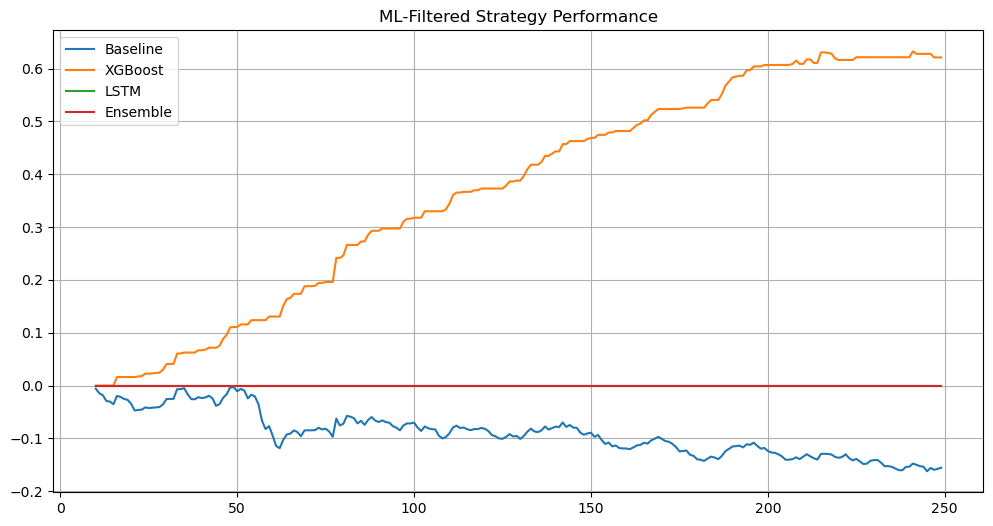

In [100]:
import matplotlib.pyplot as plt
import numpy as np

LOOKBACK = X_seq.shape[1]   
N = len(X_seq)              # valid rows for LSTM

# 1 Trim dataframe & X to LSTM-compatible length
df_bt = df.iloc[-N:].copy()
X_bt = X.iloc[-N:].copy()

# 2 ML predictions
df_bt['XGB_prob'] = model_xgb.predict_proba(X_bt)[:, 1]
df_bt['LSTM_prob'] = model_lstm.predict(X_seq, verbose=0).flatten()

# 3️ Threshold
THRESHOLD = 0.6
df_bt['ML_XGB_signal'] = (df_bt['XGB_prob'] > THRESHOLD).astype(int)
df_bt['ML_LSTM_signal'] = (df_bt['LSTM_prob'] > THRESHOLD).astype(int)

# 4️ Strategy filtering
df_bt['Strategy_Return_XGB'] = df_bt['Strategy_Return'] * df_bt['ML_XGB_signal']
df_bt['Strategy_Return_LSTM'] = df_bt['Strategy_Return'] * df_bt['ML_LSTM_signal']

# 5 Ensemble 
df_bt['ML_Ensemble_signal'] = (
    (df_bt['XGB_prob'] > THRESHOLD) &
    (df_bt['LSTM_prob'] > THRESHOLD)
).astype(int)

df_bt['Strategy_Return_Ensemble'] = (
    df_bt['Strategy_Return'] * df_bt['ML_Ensemble_signal']
)

# 6 Cumulative return
def cumulative_return(series):
    return (1 + series).cumprod() - 1

# 7️ Plot
plt.figure(figsize=(12,6))
plt.plot(cumulative_return(df_bt['Strategy_Return']), label='Baseline')
plt.plot(cumulative_return(df_bt['Strategy_Return_XGB']), label='XGBoost')
plt.plot(cumulative_return(df_bt['Strategy_Return_LSTM']), label='LSTM')
plt.plot(cumulative_return(df_bt['Strategy_Return_Ensemble']), label='Ensemble')
plt.legend()
plt.title("ML-Filtered Strategy Performance")
plt.grid(True)
plt.show()
